In [20]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
conn=sqlite3.connect("bookstore.db")
cursor=conn.cursor()

In [5]:
cursor.execute("drop table if exists sale")

In [6]:
cursor.execute("""
create table sales(
title TEXT,
copies_sold INTEGER,
price REAL
)
""")

In [7]:
sales_data=[
    ('Data Science Basis',25,450.0),
    ('Python Programming',40,550.0),
    ('ML 101',18,600.0),
    ('DL',12,750.0),
    ('Stats',30,300.0),
    ('SQL',20,350.0),
    ('AI in real world',10,900.0)
]

In [8]:
cursor.executemany("INSERT INTO sales(title,copies_sold,price)VALUES (?,?,?)", sales_data)
conn.commit()

In [9]:
df=pd.read_sql_query("select * from sales",conn)
print(df)

                title  copies_sold  price
0  Data Science Basis           25  450.0
1  Python Programming           40  550.0
2              ML 101           18  600.0
3                  DL           12  750.0
4               Stats           30  300.0
5                 SQL           20  350.0
6    AI in real world           10  900.0


### Total copies sold by book

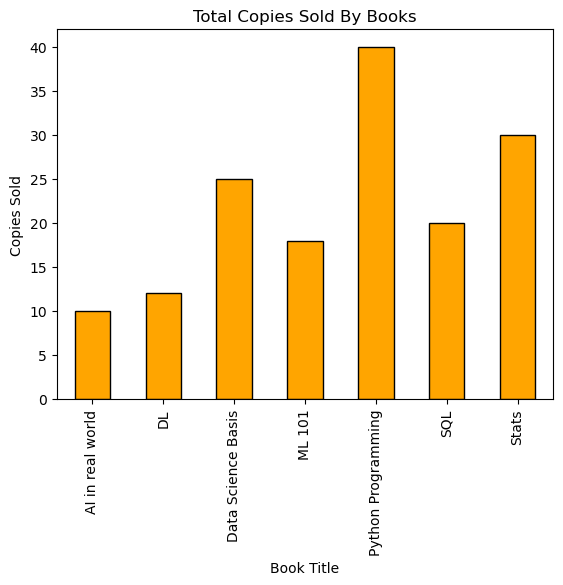

In [10]:
total_copies=df.groupby("title")['copies_sold'].sum()
total_copies.plot(kind="bar",color="orange",edgecolor="black")
plt.title("Total Copies Sold By Books")
plt.xlabel("Book Title")
plt.ylabel("Copies Sold")
plt.show()

### We can observe that amoung all the books "Python Programming"  had the highest number of copies sold.

### Avg price of books

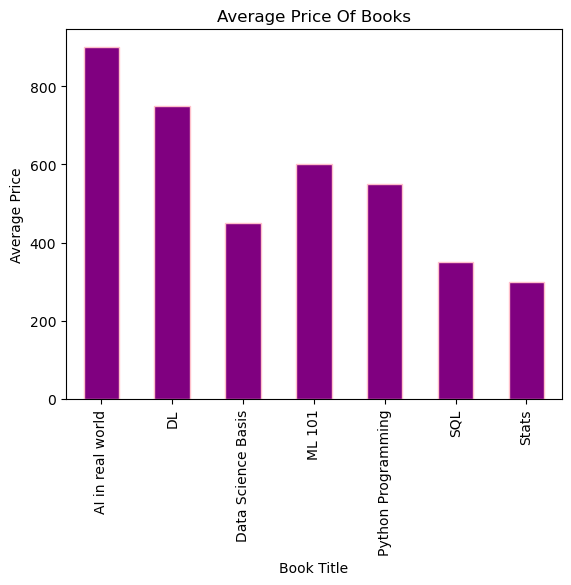

In [11]:
avg_price=df.groupby("title")['price'].mean()
avg_price.plot(kind="bar",color="purple",edgecolor="pink")
plt.title("Average Price Of Books")
plt.xlabel("Book Title")
plt.ylabel("Average Price")
plt.show()

### Among all the books "Stats" was the cheapest book.

## Scatterplot: Price v/s copies sold

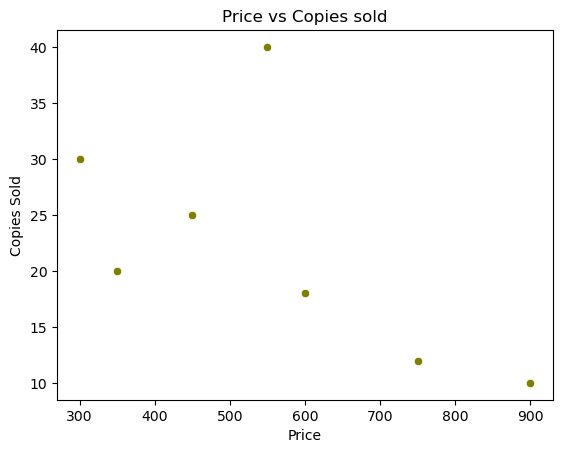

In [22]:
sns.scatterplot(x="price",y='copies_sold',data=df,color="olive")
plt.title("Price vs Copies sold")
plt.xlabel('Price')
plt.ylabel('Copies Sold')
plt.show()

### From graph it can be seen that the higher priced books had fewer sales.